# Integrating spheres

**Scott Prahl**

**June 2021**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import iadpython.sphere

## Port areas

If we look at a cross-section of an integrating sphere used in to measure transmission (left) and reflection (right) then we can see the diameters of the sphere and each of the ports.

<center>
    <img src="sphere.png" width="50%" />
</center>

The natural thing would be to use subscripts and define the relative area of the sample as $a_\mathrm{sample}$. So that is what I will do.  Relative area parameters are denoted with a followed by a letter like

$$
a_\mathrm{sample} = \frac{\mbox{Area of sample port}}{\mbox{Surface area of integrating sphere}}
$$

Other relative areas are the area of the detector  $a_\mathrm{detector}$, the area of the entrance port $a_\mathrm{entrance}$, and the area of the sphere wall $a_\mathrm{wall}$

The sphere can has wall and ports (sample, detector, and entrance).  Thus

$$
A_\mathrm{total} = A_\mathrm{wall} + A_\mathrm{sample} +  A_\mathrm{detector} +  A_\mathrm{entrance}
$$

or in terms of dimensionless relative areas 

$$
a_\mathrm{wall} = 1 -  a_\mathrm{sample} - a_\mathrm{detector} - a_\mathrm{entrance}
$$

### Spherical caps

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Spherical_cap_diagram.tiff/lossless-page1-597px-Spherical_cap_diagram.tiff.png" width="15%"/>
</center>

Note that a port with radius $a$ has a cap area on a sphere with radius $r$

$$
A_\mathrm{cap} = 2\pi r h
$$
where $h$ is the height of the cap
$$
h = r - \sqrt{r^2-a^2}
$$

The relative area is then

$$
a_\mathrm{cap} = \frac{2\pi r h}{4\pi r^2} = \frac{r - \sqrt{r^2-a^2}}{2r} \approx \frac{a^2}{4r^2} - \frac{a^4}{16r^4} + \cdots
$$

This is a tiny change from the naive approach

$$
a_\mathrm{cap} = \frac{\pi a^2}{4\pi r^2} = \frac{a^2}{4r^2}  = \frac{d_\mathrm{cap}^2}{4d_\mathrm{sphere}^2}
$$



## Integrating spheres are used to collect all light

The interior surfaces are a matte white paint (in the past this was something like a white MgSO₄ or BaSO₄) that causes any light in the sphere to bounce around multiple times in the sphere.  It does this until the light on the walls of the sphere are uniform.

### Simplest Case: No reflection from ports

The simplest thing to do is to assume that the ports absorb all light that falls on them.  The sphere walls have a reflectance of $r_\mathrm{wall}$.  Finally, all the light entering the sphere hits the wall once before it gets fully diffused.

If the power entering the sphere is $P_{in}$ then the net power on any section will be

$$
P_\mathrm{wall} = \mbox{(power from first bounce)}  + \mbox{(power from second bounce)} + \cdots
$$

or in symbols

$$
P_\mathrm{wall} = (r_\mathrm{wall}a_\mathrm{wall})P_{in} + (r_\mathrm{wall}a_\mathrm{wall})^2P_{in} + \cdots = \frac{r_\mathrm{wall}a_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}} P_{in}
$$

The sphere multiplier is defined as

$$
M = \frac{P_\mathrm{wall}}{P_\mathrm{in}} = \frac{r_\mathrm{wall}a_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}}
$$

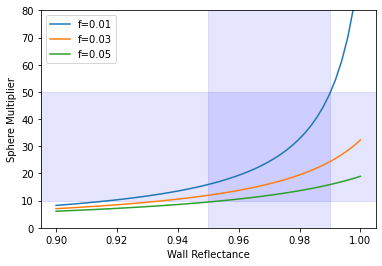

In [2]:
sphere_diameter = 250
r_wall = np.linspace(0.9,1,50)

f = 0.01
sample_port_diameter = 2*sphere_diameter * np.sqrt(f)
s = iadpython.sphere.Sphere(sphere_diameter, sample_port_diameter)
plt.plot(r_wall, s.multiplier(r_wall), label='f=%.2f'%f)

f = 0.03
sample_port_diameter = 2*sphere_diameter * np.sqrt(f)
s = iadpython.sphere.Sphere(sphere_diameter, sample_port_diameter)
plt.plot(r_wall, s.multiplier(r_wall), label='f=%.2f'%f)

f = 0.05
sample_port_diameter = 2*sphere_diameter * np.sqrt(f)
s = iadpython.sphere.Sphere(sphere_diameter, sample_port_diameter)
plt.plot(r_wall, s.multiplier(r_wall), label='f=%.2f'%f)

plt.legend()
plt.xlabel('Wall Reflectance')
plt.ylabel('Sphere Multiplier')
plt.ylim(0,80)

plt.axvspan(0.95,0.99,color='blue',alpha=0.1)
plt.axhspan(10,50,color='blue',alpha=0.1)


plt.show()

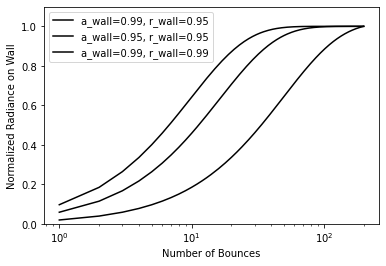

In [3]:
bounces = np.linspace(1,200,200)

a_wall = 1-0.01
r_wall = 0.95
r_cum = np.cumsum((r_wall*a_wall)**bounces)
plt.semilogx(bounces, r_cum/np.max(r_cum), 'k', label='a_wall=%.2f, r_wall=%.2f'%(a_wall,r_wall))

a_wall = 1-0.05
r_wall = 0.95
r_cum = np.cumsum((r_wall*a_wall)**bounces)
plt.semilogx(bounces, r_cum/np.max(r_cum), 'k', label='a_wall=%.2f, r_wall=%.2f'%(a_wall,r_wall))

a_wall = 1-0.01
r_wall = 0.99
r_cum = np.cumsum((r_wall*a_wall)**bounces)
plt.semilogx(bounces, r_cum/np.max(r_cum), 'k', label='a_wall=%.2f, r_wall=%.2f'%(a_wall,r_wall))

plt.legend()
plt.xlabel('Number of Bounces')
plt.ylabel('Normalized Radiance on Wall')
plt.ylim(0,1.1)

plt.show()

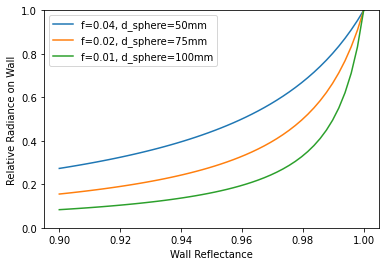

In [4]:
r_wall = np.linspace(0.9,1,50)

sphere_diameter = 50
f = 0.04
sample_port_diameter = 2*sphere_diameter * np.sqrt(f)
s = iadpython.sphere.Sphere(sphere_diameter, sample_port_diameter)
M = s.multiplier(r_wall)
plt.plot(r_wall, M/np.max(M), label='f=%.2f, d_sphere=%.0fmm'%(f,sphere_diameter))

sphere_diameter = 75
f = 0.02
sample_port_diameter = 2*sphere_diameter * np.sqrt(f)
s = iadpython.sphere.Sphere(sphere_diameter, sample_port_diameter)
M = s.multiplier(r_wall)
plt.plot(r_wall, M/np.max(M), label='f=%.2f, d_sphere=%.0fmm'%(f,sphere_diameter))


sphere_diameter = 100
f = 0.01
sample_port_diameter = 2*sphere_diameter * np.sqrt(f)
s = iadpython.sphere.Sphere(sphere_diameter, sample_port_diameter)
M = s.multiplier(r_wall)
plt.plot(r_wall, M/np.max(M), label='f=%.2f, d_sphere=%.0fmm'%(f,sphere_diameter))


plt.legend()
plt.xlabel('Wall Reflectance')
plt.ylabel('Relative Radiance on Wall')
plt.ylim(0,1)

plt.show()

## Slightly more general case

The reflectance of each of the elements in the ports 

```
port         reflection
------------------------
entrance     0
sample       r_\mathrm{sample}ample
wall         r_\mathrm{wall}all
detector     r_\mathrm{detector}etector
```

sphere walls is $r_\mathrm{wall}$ and $r_\mathrm{detector}$ is the reflectivity of the detector. 

In some experiments, the direct illumination of the sample is not perfect.  Some of the light that was supposed to hit the sample first, hits the walls of the sphere first.The fraction of light that misses the sample and hits the sphere walls is denoted by f.

Finally, we have the gain parameter

$$
\gamma = \frac{r_\mathrm{wall}a_\mathrm{wall}}{1-r_\mathrm{wall}a_\mathrm{wall}}
$$


Assume that a sphere is illuminated with diffuse light having a power *P*. Typically, the source of this diffuse light is light reflected by (or transmitted through) the sample.

We  assume that this diffuse light can reach all parts of sphere — specifically, that light from this source is not blocked by a baffle.  Multiple reflections within the sphere will increase the power falling on non-white areas in the sphere (e.g., the sample, detector, and entrance). 

The total light at a point is the sum of all light reaching that point.  The fraction of light hitting the wall, the sample port, the detector port, and the entrance port is

$$
P = P_\mathrm{wall} + P_\mathrm{sample} + P_\mathrm{detector} + P_\mathrm{entrance}
$$

For the first incidence we then have,

$$
P_\mathrm{wall}^{(1)} = a_\mathrm{wall} P, \qquad P_\mathrm{sample}^{(1)} = a_\mathrm{sample} P, \qquad P_\mathrm{detector}^{(1)} = a_\mathrm{detector} P , \qquad P_\mathrm{entrance}^{(1)} = a_\mathrm{entrance} P
$$

The light bouncing and incident on the wall for a second time

The light from the detector and sample is multiplied by $(1-a_\mathrm{entrance})$ and
not by $a_\mathrm{wall}$ because the light from the detector (and sample) is not
allowed to hit either the detector or sample.  

The second incidence on
the wall is

$$
P_\mathrm{wall}^{(2)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(1)} + (1-a_\mathrm{entrance}) r_\mathrm{detector} P_\mathrm{detector}^{(1)} + (1-a_\mathrm{entrance})r_\mathrm{sample}
 P_\mathrm{sample}^{(1)}
$$

The light that hits the wall after $k$ bounces has the same form as above 

$$
P_\mathrm{wall}^{(k)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} + (1-a_\mathrm{entrance}) r_\mathrm{detector}  P_\mathrm{detector}^{(k-1)} + (1-a_\mathrm{entrance}) r_\mathrm{sample} P_\mathrm{sample}^{(k-1)}
$$

Since the light falling on the sample and detector must come from the wall

$$
P_\mathrm{sample}^{(k)} = a_\mathrm{sample} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} \qquad\hbox{and}\qquad  P_\mathrm{detector}^{(k)} = a_\mathrm{detector}
r_\mathrm{wall} P_\mathrm{wall}^{(k-1)},
$$

Therefore,

$$
P_\mathrm{wall}^{(k)} = a_\mathrm{wall} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} + (1-a_\mathrm{entrance}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})
P_\mathrm{wall}^{(k-2)}
$$

The total power falling on the wall is just

$$
P_\mathrm{wall} = \sum_{k=1}^\infty P_\mathrm{wall}^{(k)} = 
\frac{a_\mathrm{wall} + (1-a_\mathrm{entrance}) ( a_\mathrm{detector} r_\mathrm{detector} +a_\mathrm{sample} r_\mathrm{sample})}
     {1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{entrance})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})} P
$$

The total power falling the detector is

$$
P_\mathrm{detector} = a_\mathrm{detector} P + \sum_{k=2}^\infty a_\mathrm{detector} r_\mathrm{wall} P_\mathrm{wall}^{(k-1)} = a_\mathrm{detector} P + a_\mathrm{detector} r_\mathrm{wall}
P_\mathrm{wall}
$$

The gain $G(r_\mathrm{diffuse})$ on the irradiance on the detector (relative to a black sphere),

$$
G(r_\mathrm{sample}) \equiv \frac{P_\mathrm{detector} /A_\mathrm{detector}}{P/A} 
$$

in terms of the sphere parameters

$$
G(r_\mathrm{sample})  = 1+ {1\over a_\mathrm{wall}} \cdot {a_\mathrm{wall} r_\mathrm{wall} + (1-a_\mathrm{entrance}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector}
+a_\mathrm{sample} r_\mathrm{sample})  \over 1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{entrance})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
$$

The gain for a detector in a transmission sphere is similar, but with
primed parameters to designate a second potential sphere that is used.
For a black sphere the gain $G(0) = 1$, which is easily verified by
setting $r_\mathrm{wall}=0$, $r_\mathrm{diffuse}=0$, and $r_\mathrm{detector}=0$.  Conversely, when the
sphere wall and sample are perfectly white, the irradiance at the
entrance port, the sample port, and the detector port must increase so
that the total power leaving via these ports is equal to the incident
diffuse power $P$.  

Thus the gain should be the ratio of the sphere wall area over the area
of the ports through which light leaves or $G(1)=A/(A_\mathrm{entrance}+A_\mathrm{detector})$ which
follows immediately from the gain formula with $r_\mathrm{wall}=1$, $r_\mathrm{diffuse}=1$,
and $r_\mathrm{detector}=0$.

The gain $G(r_\mathrm{sample})$ on the irradiance on the detector (relative to a black sphere),
$$
G(r_\mathrm{sample}) \equiv {P_\mathrm{detector} /A_\mathrm{detector}\over P/A} 
$$
in terms of the sphere parameters
$$
G(r_\mathrm{sample})  = 1+ {a_\mathrm{wall} r_\mathrm{wall} + (1-a_\mathrm{entrance}) r_\mathrm{wall} (a_\mathrm{detector} r_\mathrm{detector} +a_\mathrm{sample} r_\mathrm{sample}) 
\over 1- a_\mathrm{wall} r_\mathrm{wall} - (1-a_\mathrm{entrance})r_\mathrm{wall}(a_\mathrm{detector} r_\mathrm{detector} + a_\mathrm{sample} r_\mathrm{sample})}
$$